# NBA Data

## 1 - 2017 Players Tattoos

To start in a funny way, we'll work with a dataset about players and if they have tattoos or not. This dataset was made in 2017, so it isn't updated to 2022, but either way, it's nice to have a general idea.

Dataset: https://data.world/fivethirtyeight/nba-tattoos

In [1]:
import pandas as pd

tattoos = pd.read_csv('./dataset/nba-tattoos-data.csv')

# Quick look at the dataset
tattoos.head()

Player Name Tattoos yes/no
0    A.J. Price             no
1    Aaron Gray             no
2    Al Horford             no
3  Al Jefferson             no
4   Al Thornton             no

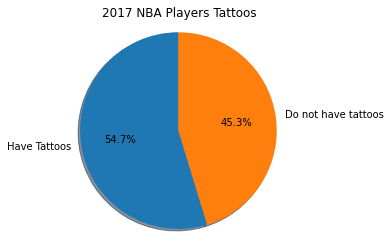

In [2]:
import matplotlib.pyplot as plt

have_tattoos = sum(tattoos["Tattoos yes/no"] == "yes")/len(tattoos["Tattoos yes/no"]) # 54.7%
dont_tattoos = sum(tattoos["Tattoos yes/no"] == "no")/len(tattoos["Tattoos yes/no"])  # 45.3%

labels = 'Have Tattoos', 'Do not have tattoos'
info = [have_tattoos, dont_tattoos]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("2017 NBA Players Tattoos")

plt.show()

From the graphic above, we can check that most of 2017 NBA players (54.7%) had tattoos.<br /><br />
But now, let's check how this percentage works for the 11 best players of the league that year. The list of the best players was made based on the MVP voting.

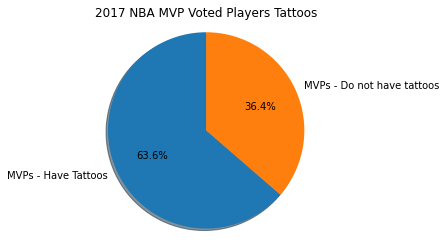

In [3]:
best_players = ["Russell Westbrook", "James Harden", "Kawhi Leonard", "LeBron James", "Isaiah Thomas", "Stephen Curry", "Giannis Antetokounmpo", "John Wall", "Anthony Davis", "Kevin Durant", "DeMar DeRozan"]

tattoos_mvps = tattoos[tattoos["Player Name"].isin(best_players)]

have_tattoos_mvp = sum(tattoos_mvps["Tattoos yes/no"] == "yes")/len(tattoos_mvps["Tattoos yes/no"]) # 63.6%
dont_tattoos_mvp = sum(tattoos_mvps["Tattoos yes/no"] == "no")/len(tattoos_mvps["Tattoos yes/no"])  # 36.4%

labels = 'MVPs - Have Tattoos', 'MVPs - Do not have tattoos'
info = [have_tattoos_mvp, dont_tattoos_mvp]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("2017 NBA MVP Voted Players Tattoos")

plt.show()

There it is! 63.6% of the 11 best NBA players from 2017 have tattoos. So, can we say that if you're a good basketball player, you have more chances to have a tattoo? I personally don't see any correlation in that, especially because the 2017 MVP (Russell Westbrook) was one of the players who didn't have a tattoo back then.<br /><br />
But, feel free to think that way if you want to.<br /><br />
Now, if you want to search for a player from the 2017 NBA Season in order to know if he had tattoos, just type the First + Last of the player down below and the program will search for you that information.

In [4]:
player_name = input("Enter the player name (First Name + Last Name): ")

Enter the player name (First Name + Last Name): Russell Westbrook


In [5]:
if tattoos["Player Name"].str.contains(player_name).any():
    player_index = tattoos[tattoos["Player Name"]==player_name].index.values
    
    if tattoos["Tattoos yes/no"][player_index[0]]=="yes":
        print(("The Player " + tattoos["Player Name"][player_index] + " have tattoos!").to_string())
    else:
        print((tattoos["Player Name"][player_index] + " does not have tattoos!").to_string())
else:
    print("Player not found in the Dataset!\nHint: Make sure you wrote the First and Last Name correctly (eg.: 'Stephen Curry', not just 'Curry' or 'Steph Curry').\nAlso, make sure the player was already in the league in the 2017 season!")

190    Russell Westbrook does not have tattoos!


## 2 - 2022 Players Stats

After a light (but fun) start, let's go through a dataset that include data of basically every stat a basketball player can have in a season (from minutes per game to personal fouls). Although the dataset contain data from players of the 1997-1998 season until the current season (2021-2022), we'll just work with the 2021-2022 season, so we can extract and analyze some information of this season in specifically.

Dataset: https://data.world/etocco/nba-player-stats

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

# This dataset is already preprocessed, so there aren't NA values.
# Another important thing to know is that this dataset have separated and total information about players that were traded,
# so some players can have 2 or more rows associated to them.

season_2022_raw = pd.read_csv('./dataset/nba_player_stats.csv')

# Filter to the 2021-2022 season and change some column names
season_2022 = season_2022_raw[season_2022_raw["Year"]=="2021-2022"]

season_2022 = season_2022.rename(columns={'Tm': 'Team', 'Pos': 'Position'})

# Quick look at the dataset
season_2022.head()

Rk             Player Position  Age Team   G  GS    MP   FG   FGA  ...  \
13770   1   Precious Achiuwa        C   22  TOR  73  28  23.6  3.6   8.3  ...   
13771   2       Steven Adams        C   28  MEM  76  75  26.3  2.8   5.1  ...   
13772   3        Bam Adebayo        C   24  MIA  56  56  32.6  7.3  13.0  ...   
13773   4       Santi Aldama       PF   21  MEM  32   0  11.3  1.7   4.1  ...   
13774   5  LaMarcus Aldridge        C   36  BRK  47  12  22.3  5.4   9.7  ...   

       ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS       Year  
13770  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  2021-2022  
13771  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  2021-2022  
13772  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  2021-2022  
13773  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  2021-2022  
13774  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  2021-2022  

[5 rows x 31 columns]

Let's start with some basic (and interesting) information about the players and the league in the 2021-2022 season

Age related facts:
1. The oldest player in the league is Udonis Haslem (MIA) and he is 41 years old.
2. The youngest players are 19 years and there are 13 of them.
3. The league's average age is 26 years old.
4. Graphic of the age distribution: 


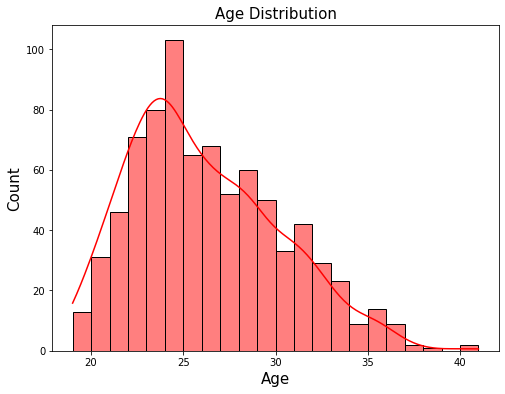

In [7]:
# Age related
oldest_player = season_2022["Age"].idxmax()
youngest_player = season_2022["Age"].min()
average_age = season_2022["Age"].mean()

print("Age related facts:")
# There is only one player with 41 years old (if you want to check, just print: sum(season_2022["Age"]==oldest_player)
print("1. The oldest player in the league is " + season_2022["Player"][oldest_player] + " (" + season_2022["Team"][oldest_player]  + ") and he is " + str(season_2022["Age"][oldest_player]) + " years old.")
print("2. The youngest players are " + str(youngest_player) + " years and there are " + str(sum(season_2022["Age"]==youngest_player)) + " of them.")
print("3. The league's average age is " + str(int(average_age)) + " years old.")
print("4. Graphic of the age distribution: ")

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(season_2022["Age"], color="red", kde=True, ax=ax, binwidth=1)
ax.set_title('Age Distribution', fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Age", fontsize= 15)
plt.show()

In [8]:
# Player related
player_count = len(season_2022["Player"].unique())
players_all_games = season_2022[season_2022["G"] == 82]

print("Players general information facts:")

print("1. There are " + str(player_count) + " players in the 2021-2022 NBA Season.")
print("2. There were only " + str(len(players_all_games["Player"])) + " players that played all the 82 season games. Here are they:\n\tSaddiq Bey*\n\tMikal Bridges*\n\tKevon Looney\n\tDwight Powell\n* These players started all the 82 games!")

Players general information facts:
1. There are 599 players in the 2021-2022 NBA Season.
2. There were only 4 players that played all the 82 season games. Here are they:
	Saddiq Bey*
	Mikal Bridges*
	Kevon Looney
	Dwight Powell
* These players started all the 82 games!


Position related facts:
1. Graphic of Position Distribution:


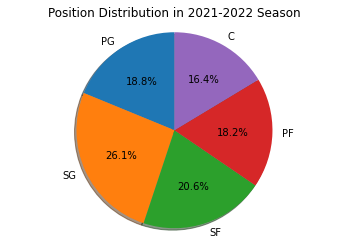

In [9]:
# Position related

print("Position related facts:")

season_2022_drop = season_2022.drop_duplicates(subset=['Player'])

print("1. Graphic of Position Distribution:")

# Some players have more than one position
PG = season_2022_drop["Position"].str.count(r'PG').sum()/len(season_2022_drop["Player"])
SG = season_2022_drop["Position"].str.count(r'SG').sum()/len(season_2022_drop["Player"])
SF = season_2022_drop["Position"].str.count(r'SF').sum()/len(season_2022_drop["Player"])
PF = season_2022_drop["Position"].str.count(r'PF').sum()/len(season_2022_drop["Player"])
C = season_2022_drop["Position"].str.count(r'C').sum()/len(season_2022_drop["Player"])

labels = 'PG', 'SG', 'SF', 'PF', 'C'
info = [PG, SG, SF, PF, C]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("Position Distribution in 2021-2022 Season")

plt.show()

Game stats related facts:
1. Top 10 PPG (Points Per Game) in 2021-2022 season: 


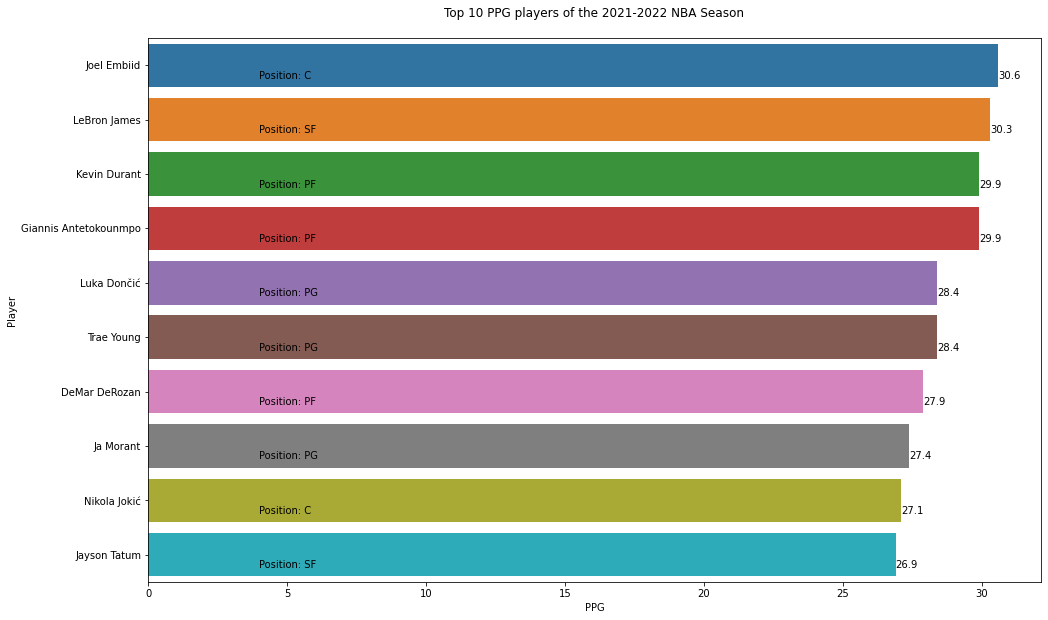

In [10]:
# Game stats related

print("Game stats related facts:")

# Minimum of 41 games played
season_2022_drop = season_2022_drop[season_2022_drop['G']>40]

#############################################################

print("1. Top 10 PPG (Points Per Game) in 2021-2022 season: ")
season_2022_PTS = season_2022_drop.sort_values(by='PTS', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_PTS["Player"][0:10], x = season_2022_PTS.PTS[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_PTS['Position'][season_2022_PTS.index[i]]))
    
    plt.text(season_2022_PTS.PTS[season_2022_PTS.index[i]],
             i + 0.25,
             round(season_2022_PTS["PTS"][season_2022_PTS.index[i]],2))

plt.ylabel('Player')
plt.xlabel('PPG')
plt.title('Top 10 PPG players of the 2021-2022 NBA Season\n')
plt.show()

2. Top 10 APG (Assists Per Game) in 2021-2022 season: 


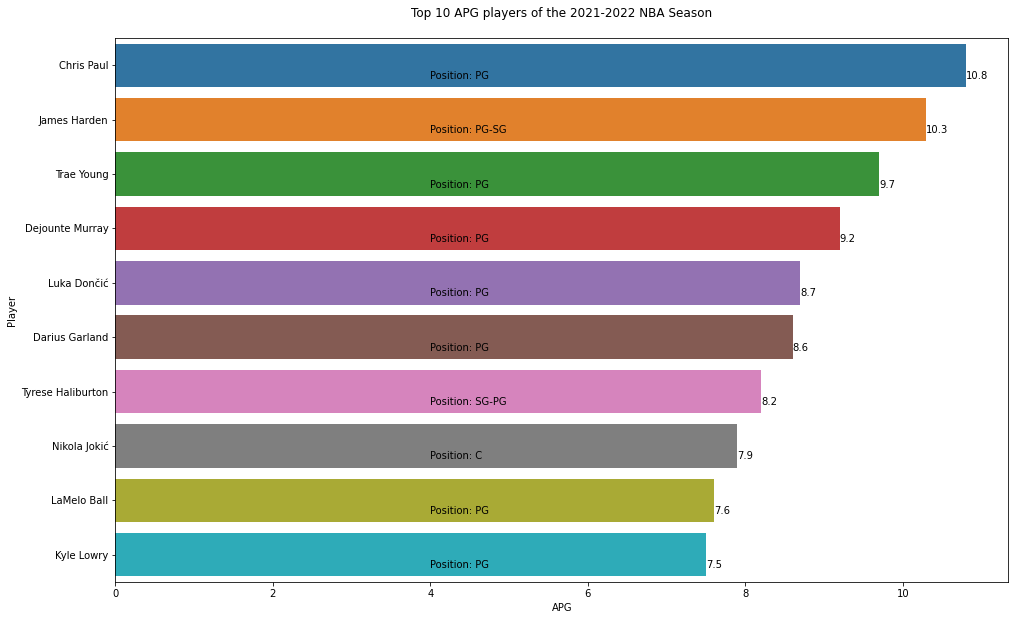

In [11]:
print("2. Top 10 APG (Assists Per Game) in 2021-2022 season: ")
season_2022_AST = season_2022_drop.sort_values(by='AST', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_AST["Player"][0:10], x = season_2022_AST.AST[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_AST['Position'][season_2022_AST.index[i]]))
    
    plt.text(season_2022_AST.AST[season_2022_AST.index[i]],
             i + 0.25,
             round(season_2022_AST["AST"][season_2022_AST.index[i]],2))

plt.ylabel('Player')
plt.xlabel('APG')
plt.title('Top 10 APG players of the 2021-2022 NBA Season\n')
plt.show()

3. Top 10 RPG (Rebound Per Game) in 2021-2022 season: 


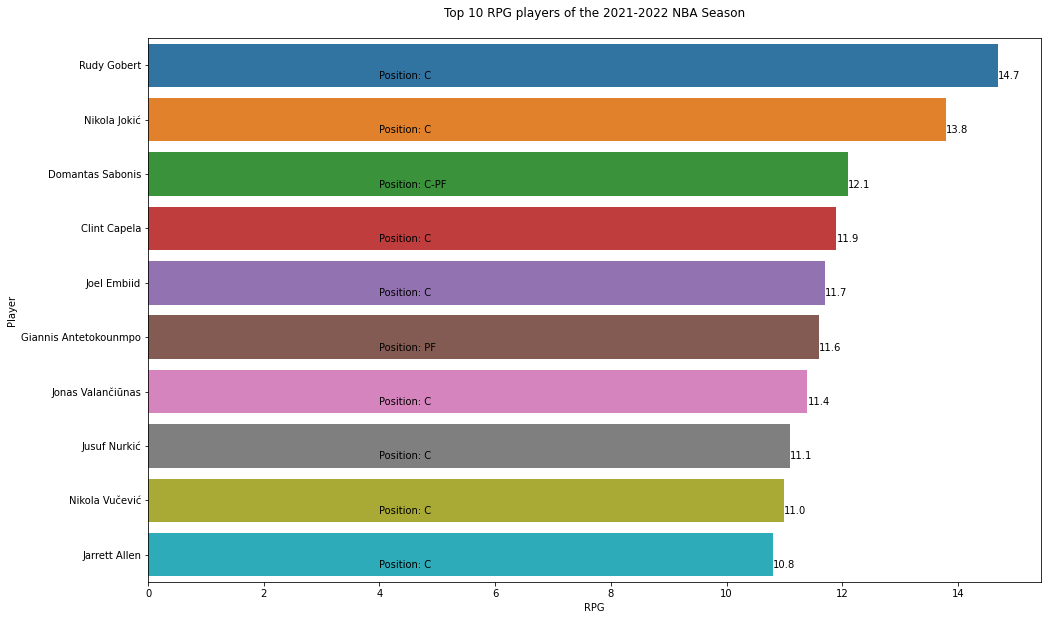

In [12]:
print("3. Top 10 RPG (Rebound Per Game) in 2021-2022 season: ")
season_2022_TRB = season_2022_drop.sort_values(by='TRB', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_TRB["Player"][0:10], x = season_2022_TRB.TRB[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_TRB['Position'][season_2022_TRB.index[i]]))
    
    plt.text(season_2022_TRB.TRB[season_2022_TRB.index[i]],
             i + 0.25,
             round(season_2022_TRB["TRB"][season_2022_TRB.index[i]],2))

plt.ylabel('Player')
plt.xlabel('RPG')
plt.title('Top 10 RPG players of the 2021-2022 NBA Season\n')
plt.show()

In [13]:
present_all_stats = [player for player in season_2022_PTS["Player"][0:10].tolist() if player in season_2022_AST["Player"][0:10].tolist() and player in season_2022_TRB["Player"][0:10].tolist()]
print("Interesting fact is only one player is present in all 3 Top 10 Lists: " + present_all_stats[0] + "\nNo wonders he's this season KIA MVP (Most Valuable Player)!")

Interesting fact is only one player is present in all 3 Top 10 Lists: Nikola Jokić
No wonders he's this season KIA MVP (Most Valuable Player)!


To finish this dataset analysis, let's get a view on the most relevants MIP (Most Improved Player) candidates and who "statistically" should've won the award.

To do that, we'll give a look in the main stats (MP, eFG%, FT%, AST, TRB, PTS, STL, BLK) and the evolution of them compared to the 2020-2021 season.

In [14]:
# Players that received at least one 1st place vote
MIP_players = ["Ja Morant", "Dejounte Murray", "Darius Garland", "Jordan Poole", "Desmond Bane", "Tyrese Maxey", "Miles Bridges"]

# Filter to the 2020-2021 and 2021-2022 season, select the columns mentioned and filter only the players
mip_dataset = season_2022_raw[(season_2022_raw["Year"]=="2021-2022") | (season_2022_raw["Year"]=="2020-2021")]

mip_dataset = mip_dataset[mip_dataset["Player"].isin(MIP_players)]

mip_dataset = mip_dataset.drop(columns=['ORB', 'DRB', 'TOV', 'PF', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%'])
mip_dataset['eFG%'] = mip_dataset['eFG%'].apply(lambda x: x*100)
mip_dataset['FT%'] = mip_dataset['FT%'].apply(lambda x: x*100)

mip_dataset

Rk           Player Pos  Age   Tm   G  GS    MP    FG   FGA  eFG%  \
13101   29     Desmond Bane  SG   22  MEM  68  17  22.3   3.4   7.3  58.6   
13151   66    Miles Bridges  PF   22  CHO  66  19  29.3   4.7   9.4  59.6   
13285  171   Darius Garland  PG   21  CLE  54  50  33.1   6.7  14.9  51.7   
13489  325     Tyrese Maxey  SG   20  PHI  61   8  15.3   3.2   7.0  49.8   
13522  352        Ja Morant  PG   21  MEM  63  63  32.6   6.8  15.2  48.7   
13528  358  Dejounte Murray  PG   24  SAS  67  67  31.9   6.6  14.5  48.5   
13589  407     Jordan Poole  SG   21  GSW  51   7  19.4   4.0   9.3  53.5   
13796   28     Desmond Bane  SF   23  MEM  76  76  29.8   6.7  14.5  56.5   
13839   67    Miles Bridges  PF   23  CHO  80  80  35.5   7.5  15.2  55.4   
14007  184   Darius Garland  PG   22  CLE  68  68  35.7   8.0  17.3  53.6   
14245  358     Tyrese Maxey  PG   21  PHI  75  74  35.3   6.4  13.3  55.2   
14287  390        Ja Morant  PG   22  MEM  57  57  33.1  10.2  20.6  53.0   
14301  400  Dejounte Murray  PG   25  SAS  68  68  34.8   8.4  18.3  50.0   
14357  450     Jordan Poole  SG   22  GSW  76  51  30.0   6.2  13.9  54.8   

        FT  FTA   FT%  TRB  AST  STL  BLK   PTS       Year  
13101  0.6  0.7  81.6  3.1  1.7  0.6  0.2   9.2  2020-2021  
13151  1.5  1.7  86.7  6.0  2.2  0.7  0.8  12.7  2020-2021  
13285  2.1  2.4  84.8  2.4  6.1  1.2  0.1  17.4  2020-2021  
13489  1.0  1.1  87.1  1.7  2.0  0.4  0.2   8.0  2020-2021  
13522  4.3  5.9  72.8  4.0  7.4  0.9  0.2  19.1  2020-2021  
13528  1.6  2.0  79.1  7.1  5.4  1.5  0.1  15.7  2020-2021  
13589  2.1  2.3  88.2  1.8  1.9  0.5  0.2  12.0  2020-2021  
13796  1.8  2.0  90.3  4.4  2.7  1.2  0.4  18.2  2021-2022  
13839  3.3  4.2  80.2  7.0  3.8  0.9  0.8  20.2  2021-2022  
14007  3.2  3.5  89.2  3.3  8.6  1.3  0.1  21.7  2021-2022  
14245  2.8  3.3  86.6  3.2  4.3  0.7  0.4  17.5  2021-2022  
14287  5.5  7.3  76.1  5.7  6.7  1.2  0.4  27.4  2021-2022  
14301  2.9  3.6  79.4  8.3  9.2  2.0  0.3  21.1  2021-2022  
14357  3.2  3.5  92.5  3.4  4.0  0.8  0.3  18.5  2021-2022

Before we start, one important aspect to understand is the position of the candidates, because some stats are more important than others when it comes to different positions. 

For example, **Point Guards (PG)** are players responsible to make plays and score, so PTS, AST and FG% are stats importants for this position. In defense, STL is their priority. There are 4 players **(Darius Garland, Tyrese Maxey, Ja Morant, Dejounte Murray)** in the list that play in this position.

On the other hand, **Shooting Guards (SG)** have the main responsability of scoring efficiently, so eFG% and PTS are stats we have to pay attention for this position. Defensively, TRB are the main stat for them. **Jordan Poole** is the only player in this position.

**Small Forwards (SF)** is basically a guy who can perform every single role in the floor, so all stats are going to be analyzed when it comes to this position. More specifically, **Desmond Bane**.

Finally, we have **Power Forwards (PF)**, who plays near to the hoop, so TRB is the main stat for them along with BLK. PTS are also important, once this position requires a big amount of mid range skills. **Miles Bridges** is the only PF we have in this list, so we're not going to show the Blocks Per Game of all the candidates.

To sum up, the improvement of some players are very related to their positions.

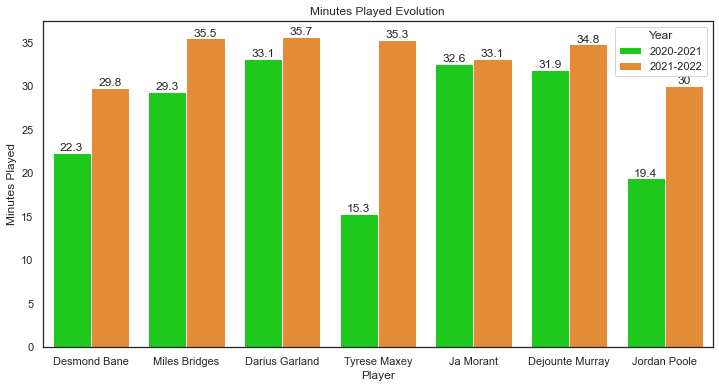

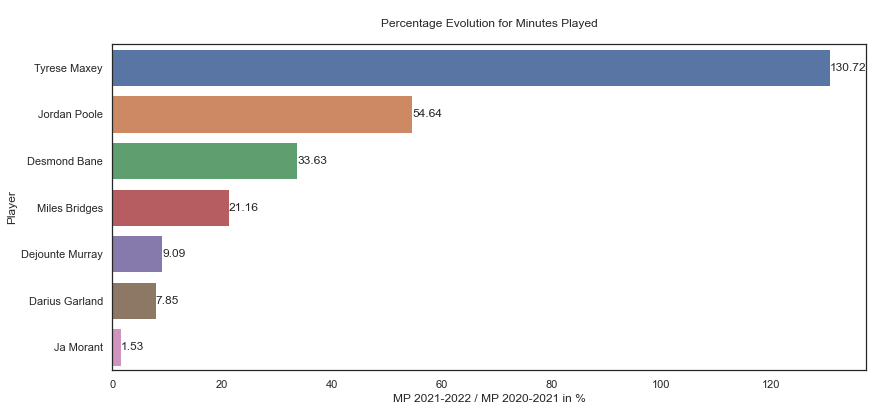

In [15]:
# Minutes Played Evolution

import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="MP",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("Minutes Played Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("Minutes Played",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
minute_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    mp_2020 = mip_dataset.iloc[i]['MP']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            mp_2021 = mip_dataset.iloc[j]['MP']
            percentage_evolution = round(((mp_2021/mp_2020) - 1)*100, 2)
            minute_evolution[player_name] = percentage_evolution
            
minute_evolution = {k: v for k, v in sorted(minute_evolution.items(), key=lambda item: item[1], reverse=True)}
players_MP = list(minute_evolution.keys())
values_MP = list(minute_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_MP, x = values_MP, orient = "h")

plt.ylabel('Player')             
plt.xlabel('MP 2021-2022 / MP 2020-2021 in %')
plt.title('\nPercentage Evolution for Minutes Played\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This isn't the main stat to know if a player was the most improved, but it's actually interesting to understand that some players may have, for example, more PPG (Points Per Game) because they had more Minutes Played Per Game.

Let's Continue!

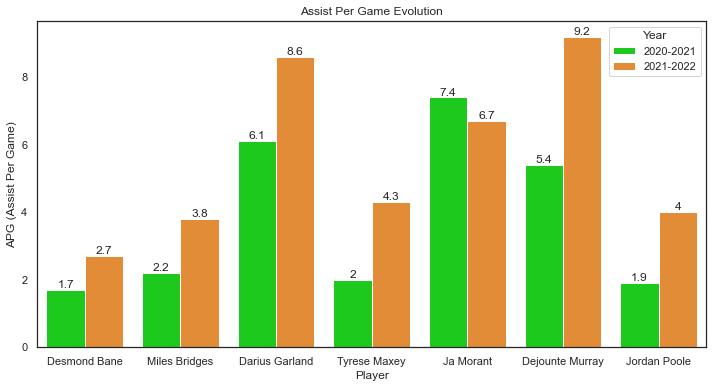

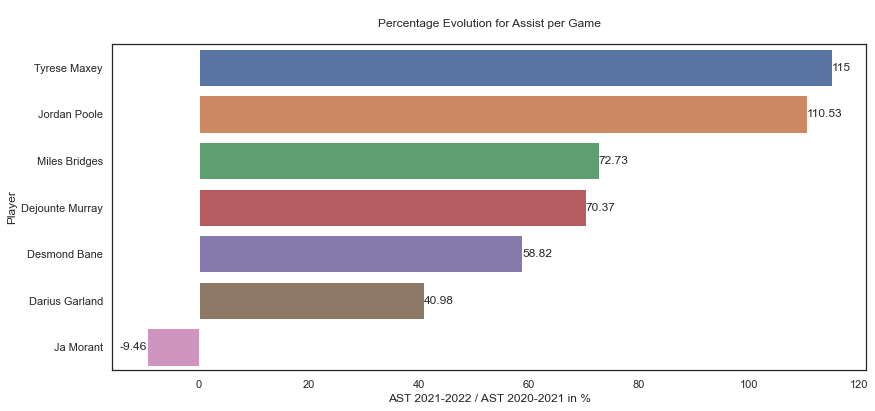

In [16]:
# Assist Evolution

import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="AST",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("Assist Per Game Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("APG (Assist Per Game)",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
assist_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    ast_2020 = mip_dataset.iloc[i]['AST']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            ast_2021 = mip_dataset.iloc[j]['AST']
            percentage_evolution = round(((ast_2021/ast_2020) - 1)*100, 2)
            assist_evolution[player_name] = percentage_evolution
            
assist_evolution = {k: v for k, v in sorted(assist_evolution.items(), key=lambda item: item[1], reverse=True)}
players_AST = list(assist_evolution.keys())
values_AST = list(assist_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_AST, x = values_AST, orient = "h")

plt.ylabel('Player')             
plt.xlabel('AST 2021-2022 / AST 2020-2021 in %')
plt.title('\nPercentage Evolution for Assist per Game\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Besides Ja Morant, basically all players had a great upgrade when it comes to Assists Per Game. That really shows why they're in this list.

Let's see how they are when it comes to Steal Per Game!

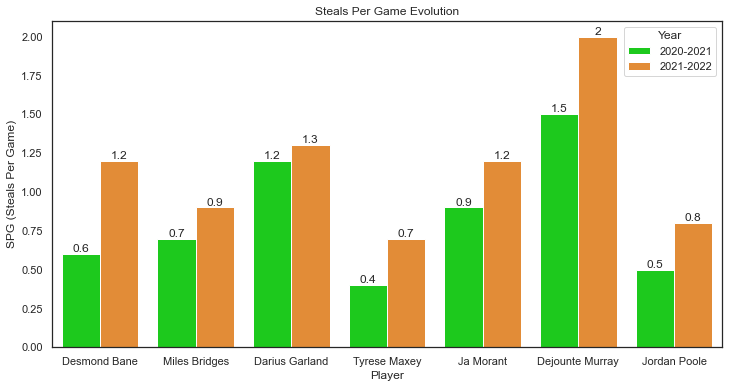

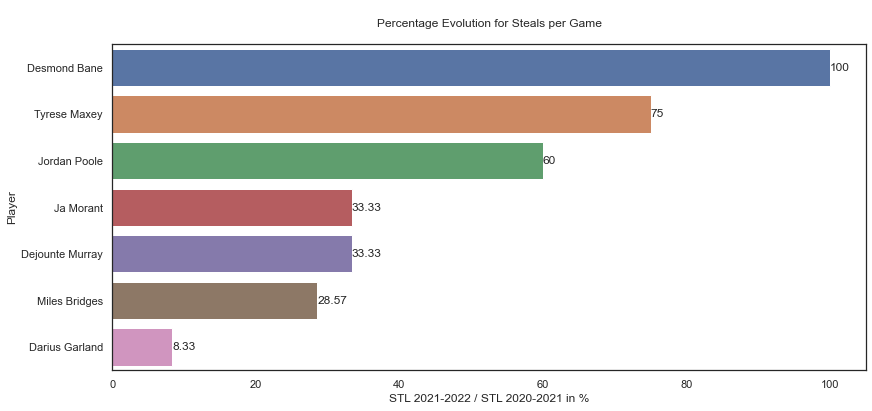

In [17]:
# Steal Evolution
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="STL",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("Steals Per Game Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("SPG (Steals Per Game)",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
steal_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    stl_2020 = mip_dataset.iloc[i]['STL']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            stl_2021 = mip_dataset.iloc[j]['STL']
            percentage_evolution = round(((stl_2021/stl_2020) - 1)*100, 2)
            steal_evolution[player_name] = percentage_evolution
            
steal_evolution = {k: v for k, v in sorted(steal_evolution.items(), key=lambda item: item[1], reverse=True)}
players_STL = list(steal_evolution.keys())
values_STL = list(steal_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_STL, x = values_STL, orient = "h")

plt.ylabel('Player')             
plt.xlabel('STL 2021-2022 / STL 2020-2021 in %')
plt.title('\nPercentage Evolution for Steals per Game\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

This stat is more related to defense and to the Guards (PG/SG) specifically.

Now, let's see how they evolved when the matter is Rebounds!

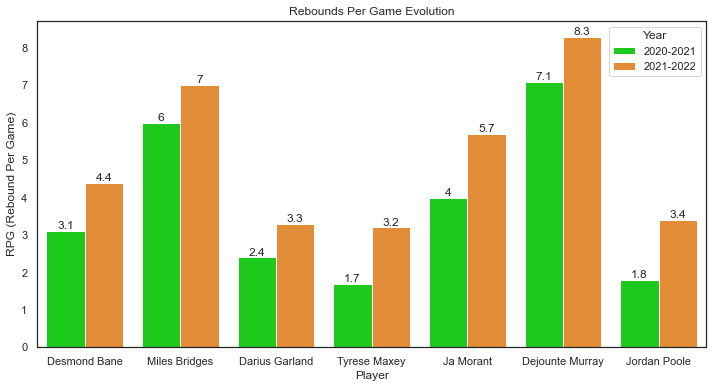

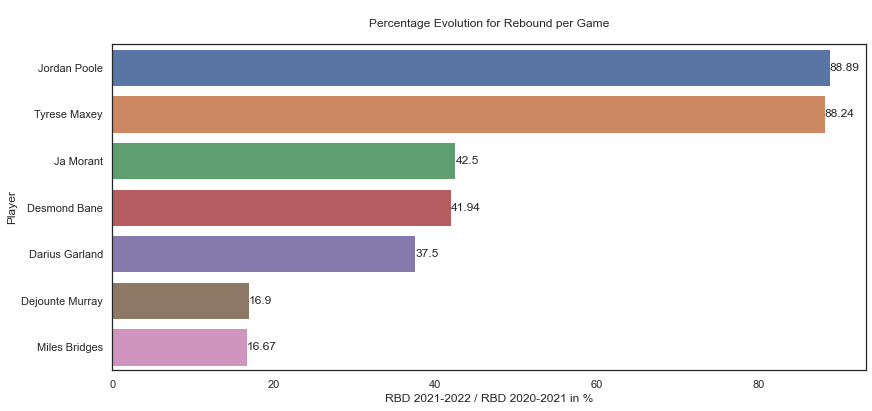

In [18]:
# Rebound Evolution
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="TRB",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("Rebounds Per Game Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("RPG (Rebound Per Game)",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
rebound_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    rbd_2020 = mip_dataset.iloc[i]['TRB']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            rbd_2021 = mip_dataset.iloc[j]['TRB']
            percentage_evolution = round(((rbd_2021/rbd_2020) - 1)*100, 2)
            rebound_evolution[player_name] = percentage_evolution
            
rebound_evolution = {k: v for k, v in sorted(rebound_evolution.items(), key=lambda item: item[1], reverse=True)}
players_RBD = list(rebound_evolution.keys())
values_RDB = list(rebound_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_RBD, x = values_RDB, orient = "h")

plt.ylabel('Player')             
plt.xlabel('RBD 2021-2022 / RBD 2020-2021 in %')
plt.title('\nPercentage Evolution for Rebound per Game\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Alright, for Rebounds Per Game, it seems that Jordan Poole and Tyrese Maxey had a outstanding improvement compared to the others candidates.

However, let's not have precipitate thoughts, once these players were also the ones with the greatest minutes played improvement. Later on, we'll discuss about it.

To continue, we're going to analyze the Efficient Field Goal Percentage evolution.

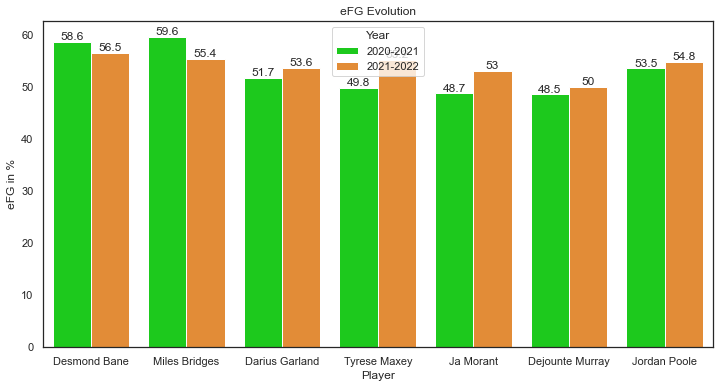

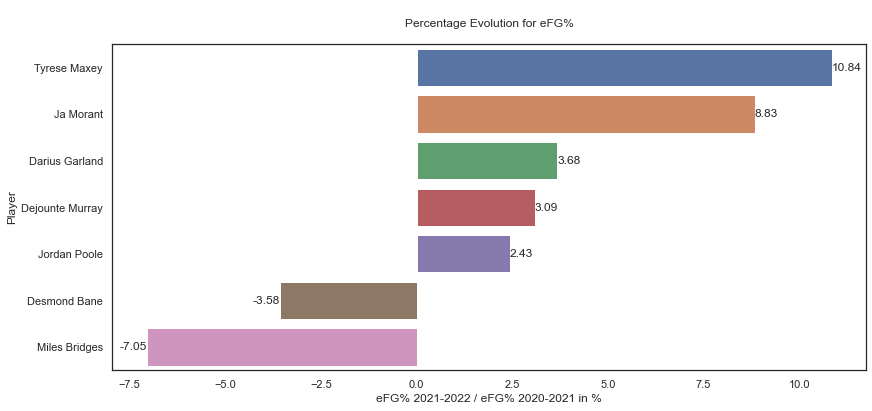

In [19]:
# eFG% Evolution
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="eFG%",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("eFG Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("eFG in %",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
efg_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    efg_2020 = mip_dataset.iloc[i]['eFG%']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            efg_2021 = mip_dataset.iloc[j]['eFG%']
            percentage_evolution = round(((efg_2021/efg_2020) - 1)*100, 2)
            efg_evolution[player_name] = percentage_evolution
            
efg_evolution = {k: v for k, v in sorted(efg_evolution.items(), key=lambda item: item[1], reverse=True)}
players_RBD = list(efg_evolution.keys())
values_RDB = list(efg_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_RBD, x = values_RDB, orient = "h")

plt.ylabel('Player')             
plt.xlabel('eFG% 2021-2022 / eFG% 2020-2021 in %')
plt.title('\nPercentage Evolution for eFG%\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

That's a great stat to understand if the players are shooting better, once the efficient Field Goal Percentage takes in consideration that 3-pointers are more difficult than 2-pointers. Thus, it basically shows in general how well (or bad) a player is scoring in the field.

Instead of analyzing the 2 and 3-pointer% or the Field Goal %, this stat takes it all in consideration.

Now, let's see probably the evolution of the "most important" stat, Points Per Game!

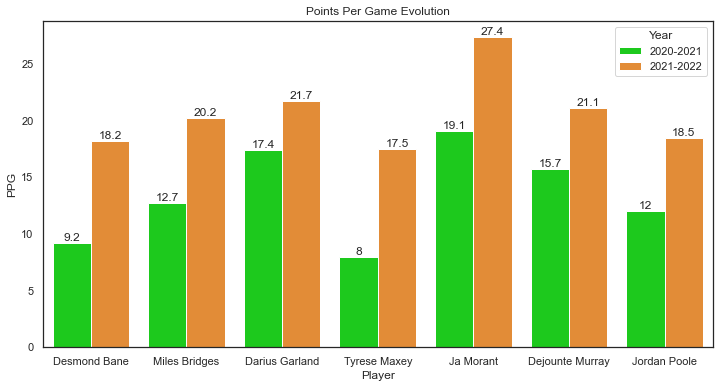

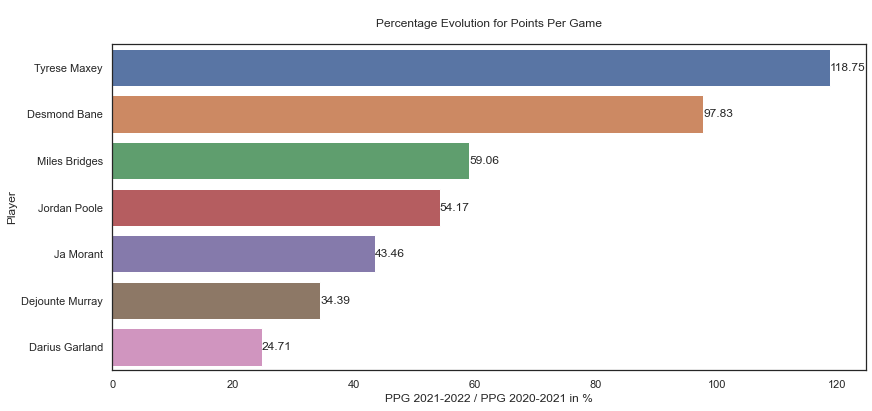

In [20]:
# Points Evolution
sns.set(style="white")

fig, ax = plt.subplots(figsize=(12,6))
colors = ["#00e600", "#ff8c1a"]
sns.barplot(x="Player", y="PTS",hue="Year", palette=colors, data=mip_dataset)
ax.set_title("Points Per Game Evolution",fontdict= {'size':12})
ax.xaxis.set_label_text("Player",fontdict= {'size':12})
ax.yaxis.set_label_text("PPG",fontdict= {'size':12})
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Evolution in %
pts_evolution = {}

for i in range(0, len(mip_dataset['Player']), 1):
    player_name = mip_dataset.iloc[i]['Player']
    pts_2020 = mip_dataset.iloc[i]['PTS']
    for j in range(i+1, len(mip_dataset), 1):
        if mip_dataset.iloc[j]['Player'] == player_name:
            pts_2021 = mip_dataset.iloc[j]['PTS']
            percentage_evolution = round(((pts_2021/pts_2020) - 1)*100, 2)
            pts_evolution[player_name] = percentage_evolution
            
pts_evolution = {k: v for k, v in sorted(pts_evolution.items(), key=lambda item: item[1], reverse=True)}
players_PTS = list(pts_evolution.keys())
values_PTS = list(pts_evolution.values())

# Plot

fig, ax = plt.subplots(figsize=(13.5,6))

sns.barplot(y = players_PTS, x = values_PTS, orient = "h")

plt.ylabel('Player')             
plt.xlabel('PPG 2021-2022 / PPG 2020-2021 in %')
plt.title('\nPercentage Evolution for Points Per Game\n')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Alright, now that we have all the graphics and data necessary, we can understand and maybe point the statistically Most Improved Player (MIP) of the 2021-2022 NBA Season.

As mentioned in the begin, we have to understand the players stats as a general thing and relate that to their positions. To make it better, we'll analyze each player individually and how they evolve and in the end choose one. Another important observation is that only stats aren't enough to say how much a player improved, once in basketball there're actions that aren't countable, but are very important.

Let's go:
1. **Miles Bridges (PF)**:<br />
- Starting with **minutes played**, Miles had a 20% improvement.<br />
- Since Miles Bridges is a Power Foward, **assists** aren't the most noticeable stat for him. However, he had a 70% evolution (2.2 to 3.8). Great stat!<br />
- As a PF, **steals** aren't the biggest stat for him either. Therefore, it isn't surprising he had a 30% improvement (not bad).<br />
- **Rebounds**, on the other hand, are very important for his position. He was the player in the list that less improved, with just 16% growth. Kinda disappointing...<br />
- When it comes to **efficient Field Goal Percentage**, he had a 7% loss, also not great.<br />
- Let's see one of the most important stats: **points**! He was the third one on this stat, going from 12ppg to 20ppg. Amazing!<br />
- Final comments about Miles Bridges: undoubtely he had a great season (specially about scoring points), but not all his stats were as great as expected from a MIP winner. So, let's continue ours analysis.

2. **Tyrese Maxey (PG)**:<br />
- One of the most notables in the graphics. The first thing to mention is how his **minutes** more than doubled, therefore, it's expected that most of his stats would naturally grew.<br />
- As a Point Guard, **assists** are a important stat for Tyrese Maxey, and it seemed like he evolved his playmaker skills having an average of 2 assists in the 2020-2021 season to 4.3 in the 2021-2022. Along with being the player with the most growth in MP, he had this achievement when it comes to assists.<br />
- For **steals**, Tyrese was the second with most % evolution (0.5 to 0.7).<br />
- When it comes to **rebounds**, he was also the second more evolved, having almost the double of what he had in 2020-2021.<br />
- Now, for **efficient Field Goal Percentage**, he was the player that more evolved (10%), what is actually great, once he basically doubled his field goals attempts, but also shoot better.<br />
- So, to finish let's analyze **points**. Once again, he was the one with the biggest evolution, jumping from 8pts to 17.5!<br />
- To sum up, Tyrese had a great season evolution, but can we say the was the player that most improved? Probably not and there's just one reason to that: all his stats kept up with his minutes growth, therefore, although he evolved and deserves to be in this list, he wasn't the player that most improved his game.

3. **Desmond Bane (SF)**:<br />
- For **Minutes Played**, Bane was the third in the list with more minutes played for game this season (+30%). So, normally, we can expect a growth in the others stats.<br />
- Being a Small Forward, basically every stat is important to Bane. Let's see how he performed with his playmaking, by analyzing his **assists** evolution. Basically, he had 1 assist more per game (1.7 to 2.7), 60% improvement. Good.<br />
- Defensively, he doubled his **steals**. Great improvement!<br />
- Along the steals, his defense when it comes to **rebounds** went from 3.1 to 4.4 per game (+40%). Another great stat!<br />
- For **efficient Field Goal Percentage**, he had a little decrease (but he tried 2x more buckets than last season). It doesn't tell much.<br />
- Finally, **points**. The second with the most improvement, almost doubling his PPG, going from 9.2 to 18.2. Great stat!<br />
- Compared to Miles Bridges and Tyrese Maxey, Desmond Bane was the first player who actually seemed to evolved in almost all stats more than the minutes played growth. When it comes to points, he really improved, scoring the double of points with less efficiency. He also deffended better, so great player improvement!

4. **Jordan Poole (SG)**:<br />
- Similar to Tyrese Maxey, Jordan Poole is very noticeable in the graphics. Starting with **minutes played**, Jordan Poole was the second one with more minutes played if compared to the last season, with a 54% growth (averaging 30 minutes per game).<br />
- Jordan Poole basically doubled his **assists** per game, jumping from 1.9 to 4. Great evolution for a SG!<br />
- **Steal** is a good deffensive stat and Poole had a 60% improvement (0.5 to 0.8). Okay.<br />
- Being a SG, **rebounds** are importants for him and he seemed to outstand in this stat, having a 89% growth. Very good!<br />
- Now, maybe the most importants stats. Beginning with **efficient Field Goal Percentage**, he basically had the same of last season (+2%).<br />
- On the other side, he had a 54% **points** per game evolution. Good!<br />
- To sum up, Jordan Poole had more minutes this season and showed that he deserved that, once he evolved in basically every stat. His position is Shooting Guard (SG) and, therefore, points are very important for him and he handled it well. Poole also had a amazing general improvement if compared to his minutes. Good contender to the award!

5. **Darius Garland (PG)**:<br />
- Darius Garland just played 2 **minutes** more per game, so his whole analysis will follow the understanding that he played basically the same amount that in the last season.<br />
- Since he's a Point Guard, **assists** are really important for him. And he didn't disappointed, 41% evolution, jumping from 6.1 to 8. Great!<br />
- When it comes to defense, **steals** remained basically the same, so not much to talk about it.<br />
- **Rebounds** aren't the biggest stat for PGs, but Garland had a 38% improvement. Not bad!<br />
- For **efficient Field Goal Percentage**, Garland had a 3% growth, which is not much, so let's see how it impacted his points.<br />
- He averaged 24% more **points** per game (last in the list). Okay.<br />
- If we understand that Garland played almost the same he played last season, we can tell he had an outstanding improvement this season, because he had great evolution in basically all stats. No wonders he was an All-Star!

6. **Dejounte Murray (PG)**:<br />
- Murray had a 3 **minutes** growth season-to-season. So similarly to Garland, he basically had the same amount of minutes played per game.<br />
- Being a Point Guard, **assists** show how the playmaking skills of a player improved. When we talk about Murray, he had a 70% evolution (5.4 to 9.2). Terrific!<br />
- **Steals** are important to know how a guard improved his defense and he went from 1.5 to 2 steals per game. The evolution wasn't that noticeable, but this is a great stat for a player!<br />
- When it comes to **rebounds**, Murray had a 17% evolution (7.1 to 8.3). Okay.<br />
- Murray had only 3% evolution on his **efficient Field Goal Percentage**, shooting a little more (4 more attempts) than the last season. So, nothing really outstading, but an advancement.<br />
- Finally, for **points**, which are important for his position, he jumped 35%, averaging 21.1 points.<br />
- Alright, if we consider that Murray played basically the same of the last season, his improvement was amazing! He had a great increase in all stats and with incredible numbers (All-Star player). Really amazing season for a player and a good contender for the award.

7. **Ja Morant (PG)**:<br />
- The last player of the list. He was the player with least **minutes played** increase (only 1.5%).<br />
- Playing as a Point Guard, **assists** are a big stat for Ja Morant. However, he had a 9% decrease. Not a good start.<br />
- When it comes to **steals**, he had a 33% improvement (1.2 SPG this season). A slightly evolution in defense.<br />
- For **rebounds**, Ja had the third biggets evolution (42.5%). Great evolution!<br />
- As mentioned before, **efficient Field Goal Percentage** is an important aspect for PGs and Morant had a 8.8% improvement, which is great, considering that he tried more field goals attempts this season.<br />
- To finish, let's see his **points** evolution. He went from 19ppg to 27.4 (43%)! That's a big jump for a player!<br />
- Morant had a fantastic season, maintaning the same amount of minutes played and being more efficient with his scoring and defense skills showed he really put on some work this season. Really great contender to the award. Also All-Star this season.

This was the real final voting:
![MIP Voting](./media/mip.jpg)

From our statistical analysis, this would be my votes and the reason for each choice:<br />
1. **First Place**: Dejounte Murray.<br />
    He basically played the same amount of minutes from the last season. However, he had a great evolution in every single category. We discussed a lot how players have to evolved in their positions and Murray showed a pretty good work as a PG this year, his assist evolution was amazing! It's also important to mention that defensively, he seems to be a great player with his steals and rebounds. He didn't desappointed when it comes to scoring, having a noticeable jump in PPG and eFG%. Having this incredibles numbers in a Team that wasn't a contender for the NBA title is incredible and that's why I would vote on him as the First Most Improved Player. 
2. **Second Place**: Ja Morant.<br />
    This guy right here has been a star his whole career (even though it's still a short one). From Rookie of the Year to Most Improved Player, these are my reasons for putting him as second place: as discussed, he played basically the same amount of time from the last season, however, he evolved a lot when it comes to defense (specially rebounds) and scoring (great PPG evolution, being the 8th that most scored in the whole league). He was the main player to put the Grizzlies in a great position this year and this show a whole team evolution, but we can highlight Ja. I didn't give him the first place because his assists (important stat for a PG) wasn't his strength this year. Anyways, he deserved the award!
3. **Third Place**: Desmond Bane.<br />
    Ja Morant's team partner, Desmond Bane was one of the players that more received lights this season, and with reasons for that! First things first, Bane had more minutes this season and he showed his value. As mentioned before, playing as a SF requires a lot in all aspects and he outstand in basically all of them. Playmaking and defense were noticeables skills he showed to do better this season, but nothing compared to his scoring skills. Playing 30% more, he doubled his PPG and this is incredible, once he also played great in others points of his game. To sum up, he had a great season and I'm not putting him in a higher place in my votes because compared to what Morant and Murray performed this season (both were All-Stars), it's hard to put Bane in the same place that theirs. However, he deserves to be here in this list.
    
To finish my comments in this whole MIP thing, I'd like to reinforce that this was a very simple and statistical analysis (with studying purposes) and there are plenty other aspects, stats, skills and knowledge to be look for when nomating the MIP award winner. With that said, I'd also have the opportunity to say that all players in the list had a great improvement and deserved to be there and had votes on them. 

## 3 - NBA Finals and MVPs

The dataset will give a look now has some information about the NBA Finals since 1950. It also has some interesting data about the MVP award since 1956.

Dataset: https://data.world/datatouille/nba-finals-and-mvps

In [82]:
import pandas as pd
import numpy as np

finals_mvp = pd.read_excel('./dataset/finals-mvp.xlsx')
data_2019 = {
    'Year': 2019, 
    'Western Champion': 'Golden State Warriors', 
    'Eastern Champion': 'Toronto Raptors',
    'Result': '2–4',
    'NBA Champion': 'Toronto Raptors',
    'NBA Vice-Champion': 'Golden State Warriors',
    'Final Sweep ?': False,
    'MVP Name': 'G. Antetokounmpo',
    'MVP Height (m)': 2.11,
    'MVP Height (ft)': 6.11,
    'MVP Position': 'Center',
    'MVP Team': 'Milwaukee Bucks',
    'MVP Nationality': 'Greece',
    'MVP status': 'Not reached Final'}

data_2020 = {
    'Year': 2020, 
    'Western Champion': 'Los Angeles Lakers', 
    'Eastern Champion': 'Miami Heat',
    'Result': '4–2',
    'NBA Champion': 'Los Angeles Lakers',
    'NBA Vice-Champion': 'Miami Heat',
    'Final Sweep ?': False,
    'MVP Name': 'G. Antetokounmpo',
    'MVP Height (m)': 2.11,
    'MVP Height (ft)': 6.11,
    'MVP Position': 'Center',
    'MVP Team': 'Milwaukee Bucks',
    'MVP Nationality': 'Greece',
    'MVP status': 'Not reached Final'}

data_2021 = {
    'Year': 2021, 
    'Western Champion': 'Phoenix Suns', 
    'Eastern Champion': 'Milwaukee Bucks',
    'Result': '2–4',
    'NBA Champion': 'Milwaukee Bucks',
    'NBA Vice-Champion': 'Phoenix Suns',
    'Final Sweep ?': False,
    'MVP Name': 'N. Jokic',
    'MVP Height (m)': 2.11,
    'MVP Height (ft)': 6.11,
    'MVP Position': 'Center',
    'MVP Team': 'Denver Nuggets',
    'MVP Nationality': 'Serbia',
    'MVP status': 'Not reached Final'}

finals_mvp = finals_mvp.append(data_2019, ignore_index=True)
finals_mvp = finals_mvp.append(data_2020, ignore_index=True)
finals_mvp = finals_mvp.append(data_2021, ignore_index=True)

# Adding missing data from last year

# Quick look at the dataset
print(finals_mvp.info())
# Last year available in the dataset
print(finals_mvp.loc[71])
finals_mvp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               72 non-null     int64  
 1   Western Champion   72 non-null     object 
 2   Eastern Champion   72 non-null     object 
 3   Result             72 non-null     object 
 4   NBA Champion       72 non-null     object 
 5   NBA Vice-Champion  72 non-null     object 
 6   Final Sweep ?      72 non-null     bool   
 7   MVP Name           66 non-null     object 
 8   MVP Height (m)     66 non-null     float64
 9   MVP Height (ft)    66 non-null     float64
 10  MVP Position       66 non-null     object 
 11  MVP Team           66 non-null     object 
 12  MVP Nationality    66 non-null     object 
 13  MVP status         66 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 7.5+ KB
None
Year                              2021
Western Champ

C:\Users\mixer\AppData\Local\Temp\ipykernel_9336\3057096074.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finals_mvp = finals_mvp.append(data_2019, ignore_index=True)
C:\Users\mixer\AppData\Local\Temp\ipykernel_9336\3057096074.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finals_mvp = finals_mvp.append(data_2020, ignore_index=True)
C:\Users\mixer\AppData\Local\Temp\ipykernel_9336\3057096074.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finals_mvp = finals_mvp.append(data_2021, ignore_index=True)


Year    Western Champion    Eastern Champion Result        NBA Champion  \
0  1950  Minneapolis Lakers  Syracuse Nationals    4–2  Minneapolis Lakers   
1  1951    Rochester Royals     New York Knicks    4–3    Rochester Royals   
2  1952  Minneapolis Lakers     New York Knicks    4–3  Minneapolis Lakers   
3  1953  Minneapolis Lakers     New York Knicks    4–1  Minneapolis Lakers   
4  1954  Minneapolis Lakers  Syracuse Nationals    4–3  Minneapolis Lakers   

    NBA Vice-Champion  Final Sweep ? MVP Name  MVP Height (m)  \
0  Syracuse Nationals          False      NaN             NaN   
1     New York Knicks          False      NaN             NaN   
2     New York Knicks          False      NaN             NaN   
3     New York Knicks          False      NaN             NaN   
4  Syracuse Nationals          False      NaN             NaN   

   MVP Height (ft) MVP Position MVP Team MVP Nationality MVP status  
0              NaN          NaN      NaN             NaN        NaN  
1              NaN          NaN      NaN             NaN        NaN  
2              NaN          NaN      NaN             NaN        NaN  
3              NaN          NaN      NaN             NaN        NaN  
4              NaN          NaN      NaN             NaN        NaN

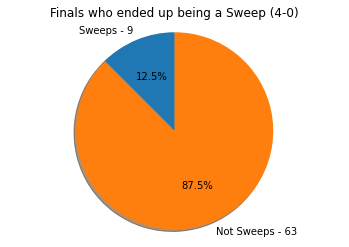

Interesting start! We can notice that only 9 NBA Finals since 1950 ended up with only one team winning all games.
Let's take a look at the teams who made the finals easy...

1959 Boston Celtics
1971 Milwaukee Bucks
1975 Golden State Warriors
1983 Philadelphia 76ers
1989 Detroit Pistons
1995 Houston Rockets
2002 Los Angeles Lakers
2007 San Antonio Spurs
2018 Golden State Warriors

Special look at the Golden State Warriors for being the only team who swept in the Finals twice!


In [83]:
# Sweeps

import matplotlib.pyplot as plt

sweep = sum(finals_mvp["Final Sweep ?"])/len(finals_mvp["Final Sweep ?"]) # 12.5%
not_sweep = sum(~finals_mvp["Final Sweep ?"])/len(finals_mvp["Final Sweep ?"])  # 87.5%

labels = 'Sweeps - ' + str(sum(finals_mvp["Final Sweep ?"])), 'Not Sweeps - ' + str(sum(~finals_mvp["Final Sweep ?"]))
info = [sweep, not_sweep]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("Finals who ended up being a Sweep (4-0)")

plt.show()

print("Interesting start! We can notice that only 9 NBA Finals since 1950 ended up with only one team winning all games.\nLet's take a look at the teams who made the finals easy...\n")
sweeps = finals_mvp[finals_mvp["Final Sweep ?"]]
sweeps_champions = sweeps.filter(['Year', 'NBA Champion'], axis=1)
for _, row in sweeps_champions.iterrows():
    print(row['Year'], row['NBA Champion'])
    
print('\nSpecial look at the Golden State Warriors for being the only team who swept in the Finals twice!')

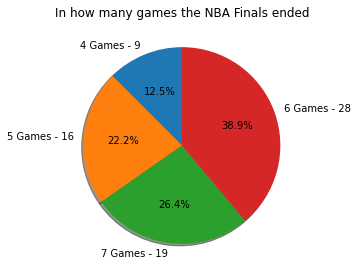

Basically 40% of all finals since 1950 had 6 games (ended up 4-2 for one of the teams playing). Followed by 26.4% of the finals having 7 games (always great to watch a game 7)!


In [84]:
import seaborn as sns
# Finals Results
game4 = sum(finals_mvp['Result'] == '4–0') + sum(finals_mvp['Result'] == '0–4') + sum(finals_mvp['Result'] == '4-0') #9
game5 = sum(finals_mvp['Result'] == '4–1') + sum(finals_mvp['Result'] == '1–4') #16
game6 = sum(finals_mvp['Result'] == '4–2') + sum(finals_mvp['Result'] == '2–4') + sum(finals_mvp['Result'] == '4-2') #28
game7 = sum(finals_mvp['Result'] == '4–3') + sum(finals_mvp['Result'] == '3–4') #19

labels = '4 Games - ' + str(game4), '5 Games - ' + str(game5), '7 Games - ' + str(game7), '6 Games - ' + str(game6)
info = sorted([game4, game5, game6, game7])

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title('In how many games the NBA Finals ended\n')
plt.show()

print("Basically 40% of all finals since 1950 had 6 games (ended up 4-2 for one of the teams playing). Followed by 26.4% of the finals having 7 games (always great to watch a game 7)!")

There are others interesting facts that can be dig from the Finals datas. However, because it's only available Finals from 1950 until now, some data would be missing from previous finals.

Therefore, we're going to analyze the MVP dataset and see what we can learn new from it!

In [85]:
# Limpando os valores vazios
mvp_clean = finals_mvp.dropna()
mvp_clean['MVP Height (m)'].astype(str).astype(float)

6     2.06
7     1.85
8     2.08
9     2.06
10    2.16
      ... 
67    1.91
68    1.96
69    2.11
70    2.11
71    2.11
Name: MVP Height (m), Length: 66, dtype: float64

In [86]:
n_mvps = len(mvp_clean['MVP Name'].unique()) # -1 because of the nan value
print("The NBA in 66 years of the award had " + str(n_mvps) + " different players who won the MVP trophy.")
mvp_champion = sum(mvp_clean['MVP status'] == 'Champion')/(len(mvp_clean['MVP status']))
print(str(round(mvp_champion, 3)) + "% of the seasons the MVP winner also won the NBA Finals.")
tallest = mvp_clean['MVP Height (m)'].idxmax()
print("The tallest player to ever win a MVP was: " + mvp_clean.loc[tallest]['MVP Name'] + ", " + str(mvp_clean.loc[tallest]['MVP Height (m)']) + "m.")
shortest = mvp_clean['MVP Height (m)'].idxmin()
print("On the other hand, the shortest was: " + mvp_clean.loc[shortest]['MVP Name'] + ", " + str(mvp_clean.loc[shortest]['MVP Height (m)']) + "m.")

The NBA in 66 years of the award had 36 different players who won the MVP trophy.
0.348% of the seasons the MVP winner also won the NBA Finals.
The tallest player to ever win a MVP was: K. AJabbar, 2.18m.
On the other hand, the shortest was: A. Iverson, 1.83m.


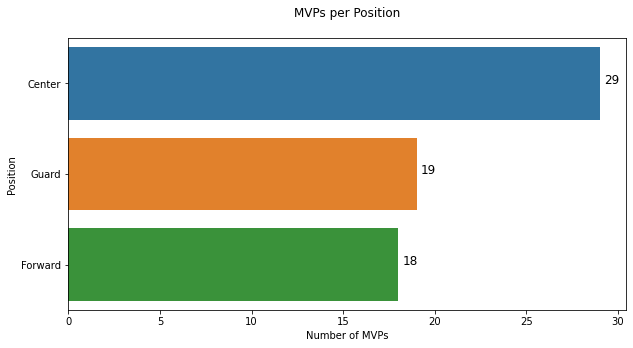

In [87]:
# MVP per position
plt.figure(figsize = (10,5))

positions = ['Center', 'Guard', 'Forward']
mvp_count = sorted([count for count in mvp_clean.groupby(['MVP Position'])['MVP Position'].count()], reverse=True)

sns.barplot(y = positions, x = mvp_count, orient = "h")

for i in range(3):
    
    plt.text(mvp_count[i] + 0.25,
             i,
             mvp_count[i],
             fontsize='large')

plt.ylabel('Position')
plt.xlabel('Number of MVPs')
plt.title('MVPs per Position\n')
plt.show()

In [88]:
print("From this graphic, it might be interesting to mention that the MVPs' average height is: " + str(round(mvp_clean['MVP Height (m)'].mean(),2)) + "m.")
print("This high height is probably influenced by the amount of centers (position with players tallest than the others) that won the MVP award.")

From this graphic, it might be interesting to mention that the MVPs' average height is: 2.05m.
This high height is probably influenced by the amount of centers (position with players tallest than the others) that won the MVP award.


In [89]:
print(mvp_clean.groupby(['MVP Nationality'])['MVP Nationality'].count())
print("Only 5 players who won MVP were not from America, let's see who these great overseas players are (and if they won the NBA Finals the year they were the best player in the regular season)!")

MVP Nationality
Canada      2
Germany     1
Greece      2
Nigeria     1
Serbia      1
US         59
Name: MVP Nationality, dtype: int64
Only 5 players who won MVP were not from America, let's see who these great overseas players are (and if they won the NBA Finals the year they were the best player in the regular season)!


In [90]:
for _, row in mvp_clean.iterrows():
    if row['MVP Nationality'] != 'US':
        print(str(row['Year']) + " - " + row['MVP Name'] + " (" + row['MVP Nationality'] + ") - " + row['MVP status'])
        
print("\nHakeem Olajuwon is the only foreign player who the NBA Finals the same season he won the MVP trophy.")

1994 - H. Olajuwon (Nigeria) - Champion
2005 - S. Nash (Canada) - Not reached Final
2006 - S. Nash (Canada) - Not reached Final
2007 - D. Nowitzki (Germany) - Not reached Final
2019 - G. Antetokounmpo (Greece) - Not reached Final
2020 - G. Antetokounmpo (Greece) - Not reached Final
2021 - N. Jokic (Serbia) - Not reached Final

Hakeem Olajuwon is the only foreign player who the NBA Finals the same season he won the MVP trophy.


But now, let's see how this stat is for all MVP players (Americans included).

In [91]:
print("These are the stats for MVPs and how they were when it comes to the NBA Finals: ")
not_finals = sum(mvp_clean['MVP status'] == 'Not reached Final')/len(mvp_clean['MVP status'])
print("- Not reached the Finals: " + str(round(not_finals*100,2)) + "%")
vice = sum(mvp_clean['MVP status'] == 'Vice-Champion')/len(mvp_clean['MVP status'])
print("- Reached the Finals but didn't win (Vice-Champion): " + str(round(vice*100,2)) + "%")
champion = sum(mvp_clean['MVP status'] == 'Champion')/len(mvp_clean['MVP status'])
print("- Reached the Finals and won (Champion): " + str(round(champion*100,2)) + "%")

These are the stats for MVPs and how they were when it comes to the NBA Finals: 
- Not reached the Finals: 51.52%
- Reached the Finals but didn't win (Vice-Champion): 13.64%
- Reached the Finals and won (Champion): 34.85%


Basically, 48.5% of the MVP winners reached the Finals at the same season they won the award. However, when they reached, they tended to win it (70% of times).

Finally, let's take a look in the MVP per Player who ever won and per Team.

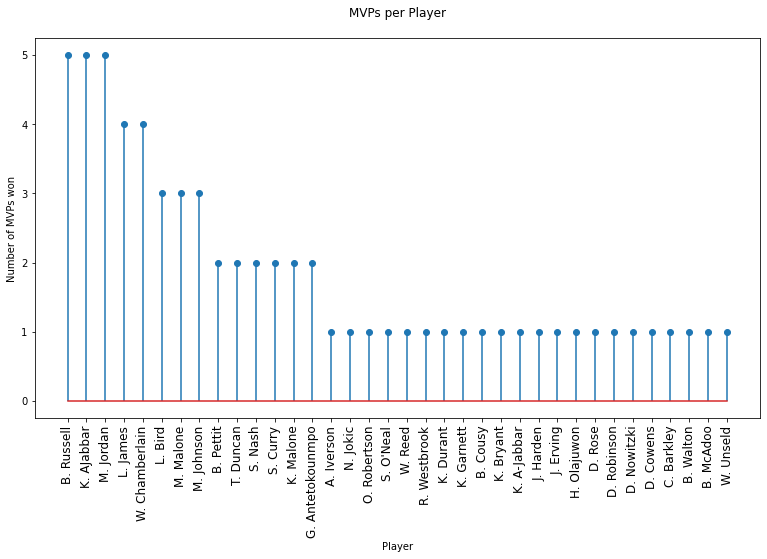

In [106]:
# MVPs per Player
mvp_list = mvp_clean.groupby(['MVP Name'])['MVP Name'].count().sort_values(ascending=False)

plt.figure(figsize = (13,7))

plt.stem(mvp_list.values)
plt.xticks(range(0,len(mvp_list.index)), mvp_list.index, rotation='vertical', fontsize='large')

plt.ylabel('Number of MVPs won')
plt.xlabel('Player')
plt.title('MVPs per Player\n')
plt.show()

A list composed only by great players. Special saying about Bill Russell, Kareem Abdul-Jabbar and Michael Jordan for being the players with most MVP awards won (5 each).

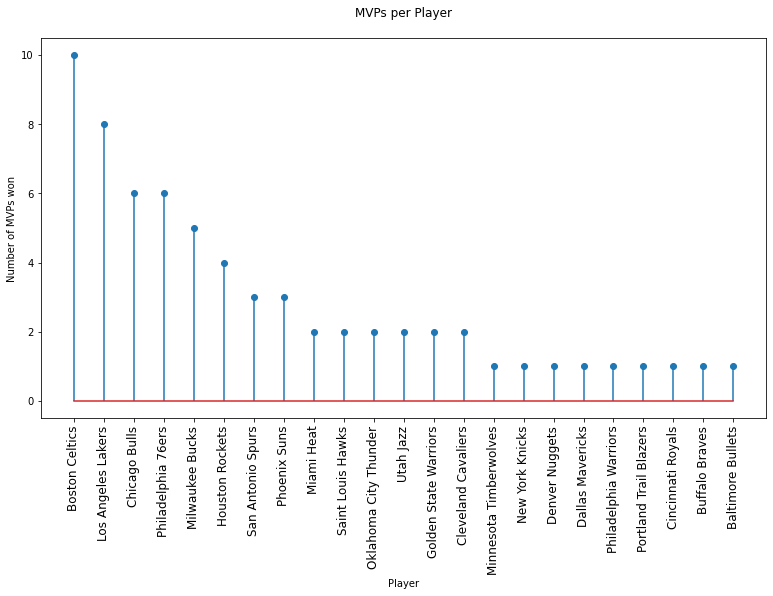

In [107]:
# MVPs per Team
# MVPs per Player
mvp_list = mvp_clean.groupby(['MVP Team'])['MVP Team'].count().sort_values(ascending=False)

plt.figure(figsize = (13,7))

plt.stem(mvp_list.values)
plt.xticks(range(0,len(mvp_list.index)), mvp_list.index, rotation='vertical', fontsize='large')

plt.ylabel('Number of MVPs won')
plt.xlabel('Player')
plt.title('MVPs per Team\n')
plt.show()

Interesting to see that 3 of the 4 teams with most NBA Championships Trophies (Boston Celtics - 17, Los Angles Lakers - 17, Chicago Bulls - 6, Golden State Warriors - 6) also are in the top 3 when it comes to MVP winners in the history.

Great teams are composed by great players.

*PS: We can consider that the Golden State Warriors had 3 MVP winners during their history, once the Philadelphia Warriors (after became the GSW) has one MVP award winner.*